In [375]:
import pandas as pd
import datetime
import numpy as np

In [376]:
# FCEs dating back to 2006
df=pd.read_excel("Full_Compliance_Evaluation_List_20220428.xlsx")

# Cleaning the dataframe
df.columns = df.columns.str.lower().str.replace(" ","_")
df.date_of_evaluation = pd.to_datetime(df.date_of_evaluation, format="%Y-%m-%d")
df.state_registrtion_number = df.state_registrtion_number.str.replace(" ","")
df.epa_class = df.epa_class.str.replace(" ","")
df = df.rename({'state_registrtion_number':'srn'},axis=1)
df.head()

,date_of_evaluation,srn,facility_name,address,city,county,district,epa_class
0,2022-03-17,P0789,"KALITTA AIR, LLC",5063 SKYWAY STREET,OSCODA,IOSCO,Bay City,SMOPTOUT
1,2022-02-28,B1991,GM LLC Saginaw Metal Casting Operations,1629 N. WASHINGTON,SAGINAW,SAGINAW,Bay City,MAJOR
2,2022-02-22,B2644,Hemlock Semiconductor Operations LLC,12334 Geddes Rd.,HEMLOCK,SAGINAW,Bay City,MAJOR
3,2022-02-10,N0854,TI GROUP AUTOMOTIVE SYSTEMS LLC - Caro Test Ce...,628 COLUMBIA ST,CARO,TUSCOLA,Bay City,MAJOR
4,2022-01-27,N1652,West Branch Production Gathering & Compressor ...,2251 SIMMONS RD,WEST BRANCH,OGEMAW,Bay City,SMOPTOUT


In [445]:
# Active permits
pti=pd.read_csv("pti-042722-all-clean.csv")
pti.approved = pd.to_datetime(pti.approved,format="%m/%d/%Y")

#Oldest permits, so I only have one srn
pti_oldest = pti.sort_values(['srn','approved']).drop_duplicates(subset='srn')
pti_srn = pti.srn.to_list()

In [446]:
# Making the approved_converted the cutoff for the data
def convert (approved):
    if approved < (pd.to_datetime("2006-05-10")):
        return "2006-05-10"
    else:
        return approved
    
pti_oldest['approved_converted']=pti_oldest.approved.apply(convert)
pti_oldest

/var/folders/_4/_njb58q944xdbv6xcbzbzmqh0000gn/T/ipykernel_1441/3775855356.py:8: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})


,company,address,srn,approved,approved_converted
0,MENASHA CORPORATION,320 N FARMER STREET -,A0023,2001-04-12,2006-05-10
4,"SODUS HARD CHROME, INC",3085 YORE AVENUE,A0083,2015-01-14,2015-01-14
5,"PANEL PROCESSING, INC",120 N INDUSTRIAL HIGHWAY,A0085,2016-04-27,2016-04-27
6,EVERETT GOODRICH TRUCKING,5614 WESSEL ROAD,A0098,2004-11-29,2006-05-10
7,BESSER COMPANY,801 JOHNSON STREET,A0099,2000-08-08,2006-05-10
...,...,...,...,...,...
4954,"RENASCENT, INC",23500 MOUND ROAD,P1253,2022-02-08,2022-02-08
4955,"BENZIE AREA CREMATORY, INC",3179 US-10 WEST,P1257,2022-03-15,2022-03-15
4956,"GREAT LAKES AGGREGATES, LLC",275 & ANN ARBOR ROAD,P1265,2022-03-29,2022-03-29
4957,ENDURA PRECISION,12880 E 9 MILE ROAD - BUILDING 2,P1266,1998-12-22,2006-05-10


In [379]:
# Source Directory
sources = pd.read_excel("CMS_Subject_Sources.xlsx")
sources.columns = sources.columns.str.lower()
sources.head()

,epa_class,facility_name,srn,address_line1,city_name,zip_cd,add_county_name,district_name,fee_category_look_code,cms_ind,...,naics_cd,airs_id,haps_class,nox_class,sox_class,co_class,pb_class,pm_class,voc_class,staff
0,MAJOR,Verso Escanaba LLC,A0884,7100 COUNTY 426 M.5 ROAD,ESCANABA,49829,DELTA,Marquette,B,1.0,...,322121.0,2604100002,MA,MA,MA,MA,MI,MA,MA,ConklinM1
1,MINOR,American Iron & Metal,A5754,prev SMURFIT-STONE CONTAINER ENTERPRISES,ONTONAGON,49953,ONTONAGON,Marquette,NaN,0.0,...,322121.0,2613100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASHERJ
2,MAJOR,UP Paper LLC.,A6475,402 West Elk Street,MANISTIQUE,49854,SCHOOLCRAFT,Marquette,B,1.0,...,322121.0,2615300001,MA,NaN,MA,NaN,NaN,MA,NaN,LuceL1
3,MINOR,MCC - NORWAY INC,B0965,512 NINTH AVE,NORWAY,49870,DICKINSON,Marquette,NaN,0.0,...,323111.0,2604300006,NaN,MI,MI,MI,MI,MI,MI,ASHERJ
4,MAJOR,NEENAH PAPER - MICHIGAN INC,B1470,501 E MUNISING AVE,MUNISING,49862,ALGER,Marquette,B,1.0,...,322121.0,2600300001,MA,MA,MA,MA,NaN,NaN,NaN,LuceL1


# Getting to Know the Data

In [380]:
# Looks like there are (75) synthetic Minor sources not in FCE database
# 5 Major Sources
# 6 Megasites?
print(sources.epa_class.value_counts())
print(df.drop_duplicates(subset="srn").epa_class.value_counts())

MINOR         4592
SM OPT OUT    1137
MAJOR          386
MEGASITE        13
Name: epa_class, dtype: int64
SMOPTOUT    1062
MAJOR        381
MINOR        281
MEGASITE       9
Name: epa_class, dtype: int64


In [381]:
# 227 synthetic Minor sources are missing from Permit Data Base
# 98 Major Sources?
df.query('~srn.isin(@pti_srn)').drop_duplicates(subset="srn").epa_class.value_counts()

SMOPTOUT    227
MINOR       186
MAJOR        98
Name: epa_class, dtype: int64

In [382]:
# 276 synthetic minor sources missing from permit database
# 103 major sources missing from permit database
sources.query('~srn.isin(@pti_srn)').drop_duplicates(subset="srn").epa_class.value_counts()

MINOR         3159
SM OPT OUT     276
MAJOR          103
MEGASITE         1
Name: epa_class, dtype: int64

In [383]:
# distribution of years
df.resample("Y", on="date_of_evaluation").size(). Just ticki

SyntaxError: invalid syntax (3962420552.py, line 2)

In [384]:
# What are the 6 companies they included? from 2006
df.query('date_of_evaluation < "2007-01-01"')

,date_of_evaluation,srn,facility_name,address,city,county,district,epa_class
492,2006-12-20,B2876,"Michigan Sugar Company, Croswell Factory",159 S Howard Ave,CROSWELL,SANILAC,Bay City,MAJOR
493,2006-11-02,A6174,GENERAL MOTORS - POWERTRAIN GROUP SAGINAW,77 W. Center St.,SAGINAW,SAGINAW,Bay City,MINOR
2742,2006-10-04,A0767,"EJ USA, Inc.",301 Spring St.,EAST JORDAN,CHARLEVOIX,Gaylord,MAJOR
5367,2006-11-21,B1592,Owens-Brockway Glass Container Inc.,500 Packard Hwy.,CHARLOTTE,EATON,Lansing,MAJOR
5368,2006-11-21,A1637,Pratt & Whitney AutoAir,5640 ENTERPRISE DR,LANSING,INGHAM,Lansing,SMOPTOUT
5369,2006-05-10,B2337,"VCF Films, Inc.",1100 Sutton Avenue,HOWELL,LIVINGSTON,Lansing,MINOR


In [386]:
# Calculating the duration between FCE's, 
# many are NaT because they are the only FCE on file
df['dif'] = df.sort_values(['srn','date_of_evaluation']).groupby('srn') \
.date_of_evaluation.diff(1)

In [389]:
df_multiple

,date_of_evaluation,srn,facility_name,address,city,county,district,epa_class,dif
0,2022-03-17,P0789,"KALITTA AIR, LLC",5063 SKYWAY STREET,OSCODA,IOSCO,Bay City,SMOPTOUT,3.47
1,2022-02-28,B1991,GM LLC Saginaw Metal Casting Operations,1629 N. WASHINGTON,SAGINAW,SAGINAW,Bay City,MAJOR,1.43
2,2022-02-22,B2644,Hemlock Semiconductor Operations LLC,12334 Geddes Rd.,HEMLOCK,SAGINAW,Bay City,MAJOR,1.93
3,2022-02-10,N0854,TI GROUP AUTOMOTIVE SYSTEMS LLC - Caro Test Ce...,628 COLUMBIA ST,CARO,TUSCOLA,Bay City,MAJOR,1.40
4,2022-01-27,N1652,West Branch Production Gathering & Compressor ...,2251 SIMMONS RD,WEST BRANCH,OGEMAW,Bay City,SMOPTOUT,3.06
...,...,...,...,...,...,...,...,...,...
6737,2008-12-04,B4032,General Motors LLC - Pontiac North Campus,850 Glenwood,PONTIAC,OAKLAND,Warren,MAJOR,0.75
6739,2008-11-03,B7625,LAFATA ENTERPRISES INC.,50905 HAYES RD.,SHELBY TWP,MACOMB,Warren,MAJOR,0.15
6742,2008-09-19,A3567,Ford Motor Company - Sterling Plant,39000 MOUND ROAD,STERLING HTS,MACOMB,Warren,SMOPTOUT,1.00
6750,2008-09-04,N6611,Depor Industries,14830 E 23 Mile Rd,SHELBY TWP,MACOMB,Warren,SMOPTOUT,1.04


In [416]:
# Separating the companies that have multiple FCEs from those that have One
df_multiple = df.query('dif.notnull()')
df_multiple.dif = (df_multiple.dif / np.timedelta64(1, 'Y')).round(2)
df_multiple

df_single = df[(df.dif.isnull()) & (df.srn.isin(pti_srn))].merge(pti_oldest[['srn','approved','approved_converted']].copy(),how="left",left_on="srn",right_on="srn")

# Calculating the FCE GAP by subtracting the converted permit date from the evaluation
# There appear to be a good deal of negative numbers from instances where the permit is 
# Younger than the FCE... not sure what to do with that right now.
df_single['dif'] = ((df_single.date_of_evaluation - df_single.approved_converted)/ np.timedelta64(1, 'Y')).round(2)
df_single.sort_values('dif',ascending=False)

,date_of_evaluation,srn,facility_name,address,city,county,district,epa_class,dif,approved,approved_converted
511,2020-08-20,B1715,"Industrial Container Services - MI, LLC",4336 HANSEN ST SW,GRAND RAPIDS,KENT,Grand Rapids,SMOPTOUT,14.28,1997-01-29,2006-05-10
972,2020-05-11,N7121,MATHY CONSTRUCTION CO PLANT 52,PORTABLE ASPHALT PLANT 52 #80-02,WAKEFIELD,GOGEBIC,Marquette,SMOPTOUT,14.00,2005-06-08,2006-05-10
514,2019-09-10,N5352,City of Portland Light and Power,723 East Grand River Avenue,PORTLAND,IONIA,Grand Rapids,SMOPTOUT,13.34,2002-11-08,2006-05-10
888,2021-09-30,N8035,CAPITAL REGION AIRPORT AUTHORITY,3170 WEST STATE RD,LANSING,CLINTON,Lansing,MAJOR,13.09,2008-08-29,2008-08-29
215,2018-08-23,M4847,"Kenwal Pickling, LLC",8223 W Warren Ave,DEARBORN,WAYNE,Detroit,SMOPTOUT,12.29,2001-01-30,2006-05-10
...,...,...,...,...,...,...,...,...,...,...,...
1177,2008-05-08,N3845,EAGLE VALLEY RECYCLE AND DISPOSAL FACILITY,600 W. SILVER BELL RD.,ORION TWP,OAKLAND,Warren,MAJOR,-13.81,2022-02-28,2022-02-28
967,2007-01-29,N2362,"Pyramid Peak Coatings, LCC",630 S Chestnut Street,OWOSSO,SHIAWASSEE,Lansing,SMOPTOUT,-13.85,2020-12-03,2020-12-03
877,2008-04-15,B6519,W. R. Grace & Co.-Conn.,1421 KALAMAZOO ST,SOUTH HAVEN,VAN BUREN,Kalamazoo,SMOPTOUT,-13.90,2022-03-10,2022-03-10
1216,2007-11-16,B2881,US Energy Distribution LLC - Novi Terminal,40600 Grand River Avenue,NOVI,OAKLAND,Warren,SMOPTOUT,-14.08,2021-12-13,2021-12-13


## Plotting

###  Distribution of FCEs by the duration before, district and source class.
* Duration before means how long of a gap there was before an FCE.

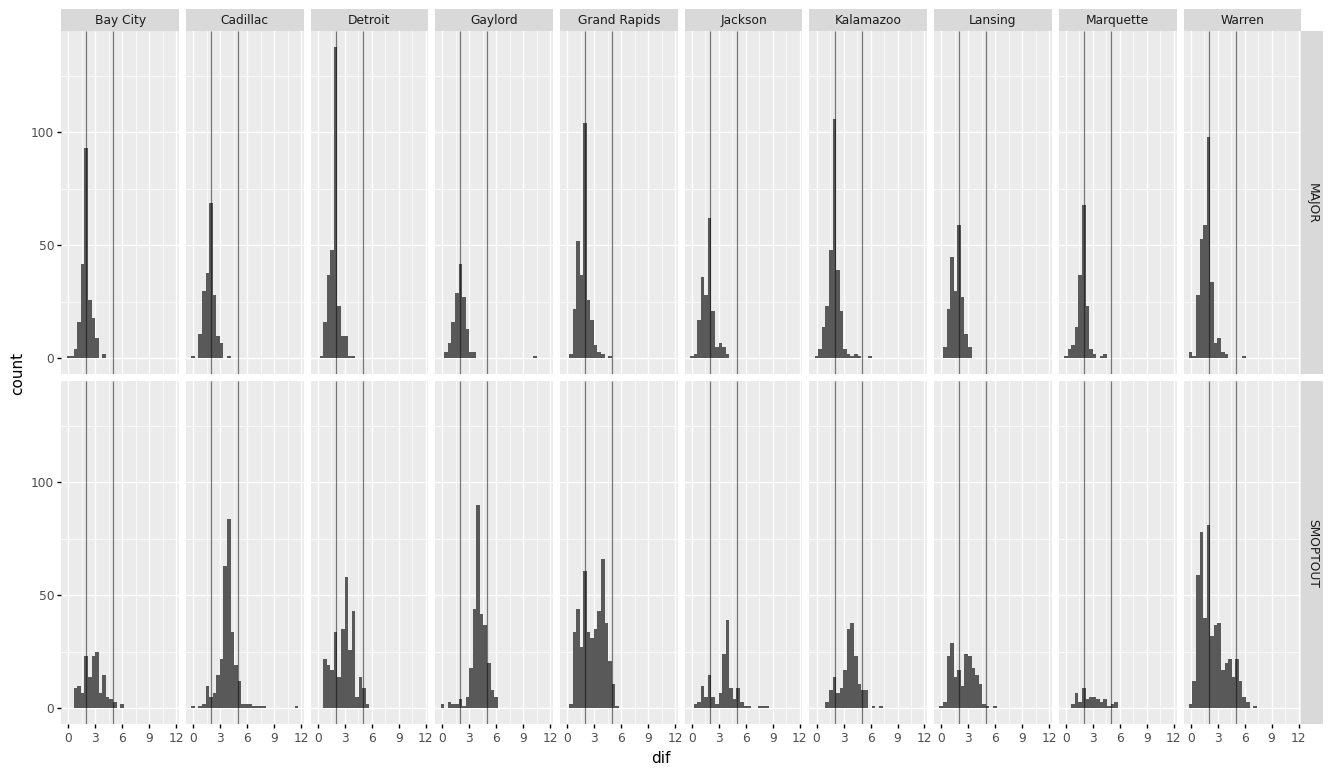

<ggplot: (339479369)>

In [395]:
interest = ['MAJOR','SMOPTOUT']
(
    ggplot(df_multiple.query('epa_class.isin(@interest)'),aes(x='dif'))
    +geom_histogram(bins=30)
    +geom_vline(xintercept=[2,5],alpha=.5)
    +facet_grid('epa_class ~ district')
    + theme(figure_size=(16,9))
)

###  Distribution of Major Source FCEs by the date, duration before, and district.


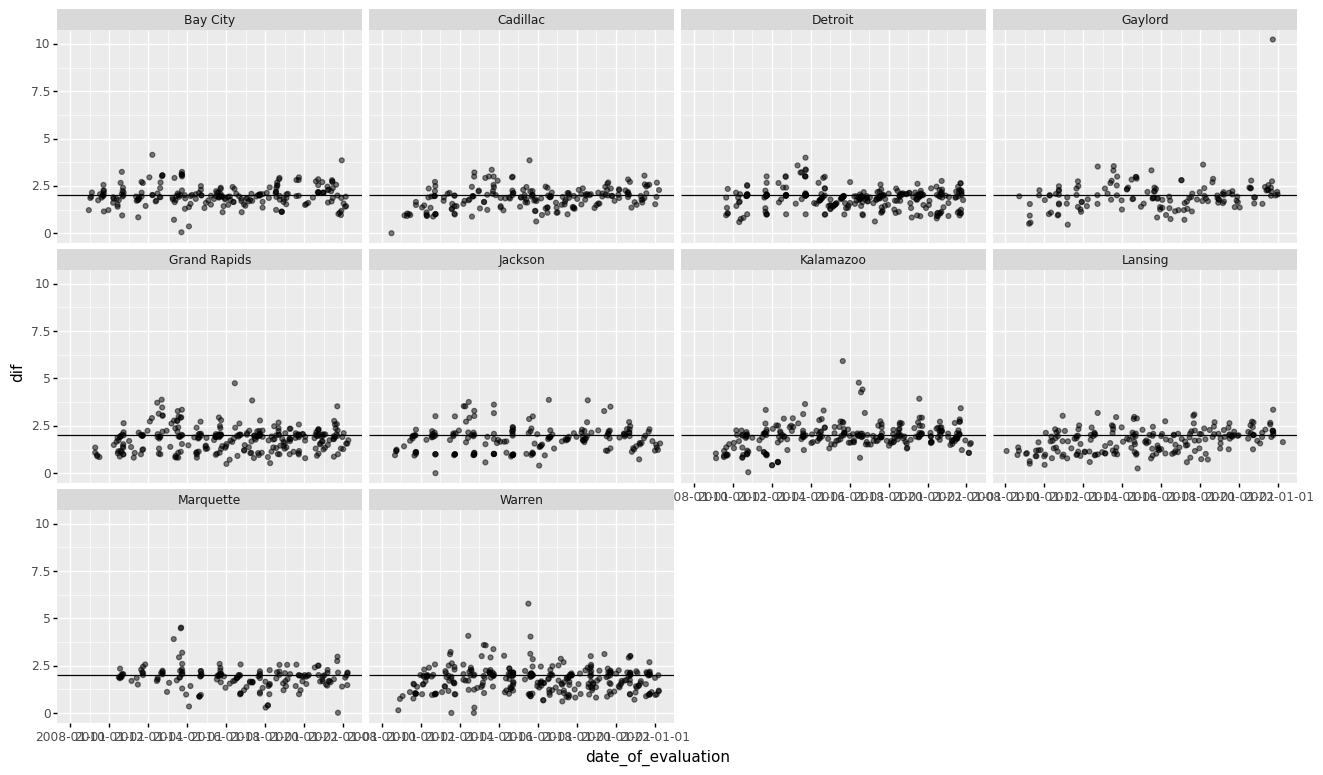

<ggplot: (339852219)>

In [351]:
interest = ['MAJOR']
(
    ggplot(df_multiple.query('epa_class.isin(@interest)'),aes(x='date_of_evaluation',y="dif"))
    +geom_point(alpha=.5)
    + geom_hline(aes(yintercept='2'))
#     +geom_vline(yintercept=[2,5],alpha=.5)
    + facet_wrap('district')
    + theme(figure_size=(16,9))
)



###  Distribution of Synthetic Minor FCEs by the date, duration before, and district.

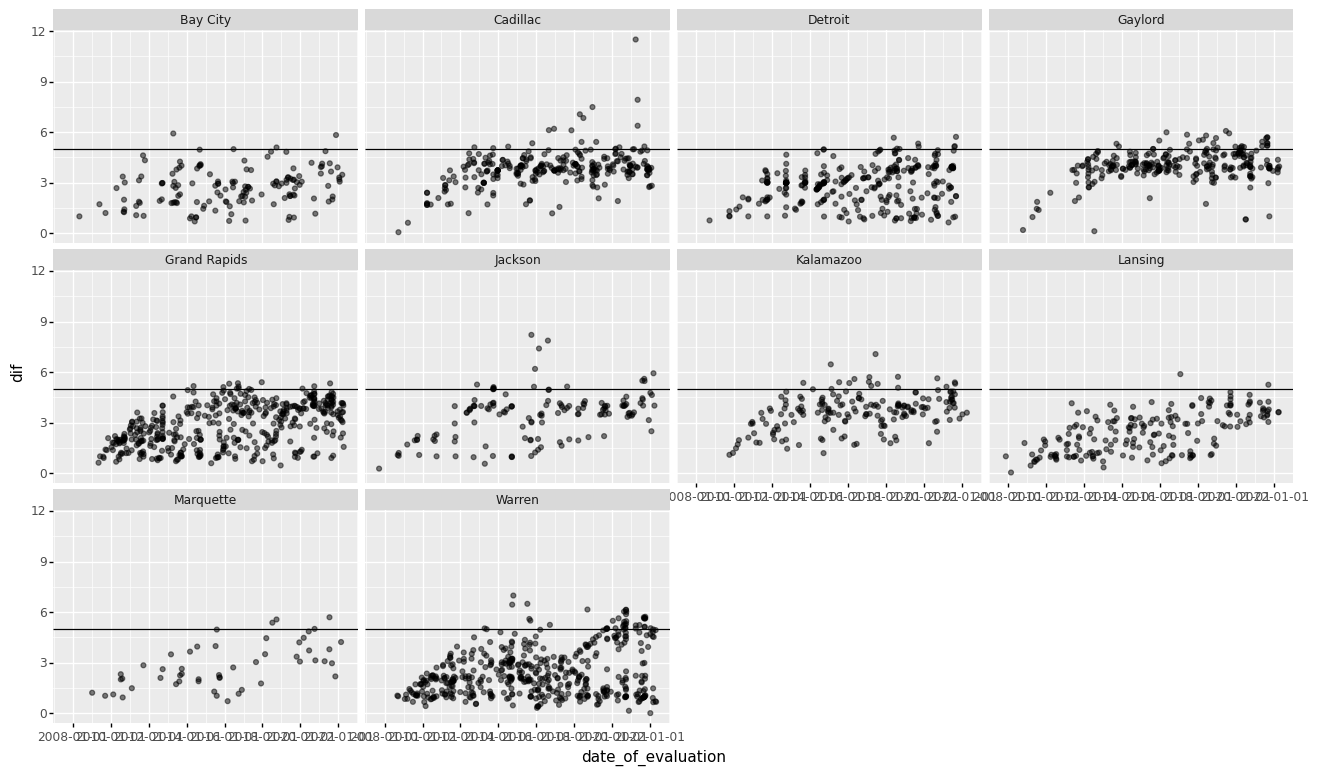

<ggplot: (345795868)>

In [350]:
interest = ['SMOPTOUT']
(
    ggplot(df_multiple.query('epa_class.isin(@interest)'),aes(x='date_of_evaluation',y="dif"))
    +geom_point(alpha=.5)
    + geom_hline(aes(yintercept='5'))
#     +geom_vline(yintercept=[2,5],alpha=.5)
    + facet_wrap('district')
    + theme(figure_size=(16,9))
)

###  Distribution of Megasite FCEs by the date, duration before, and district.

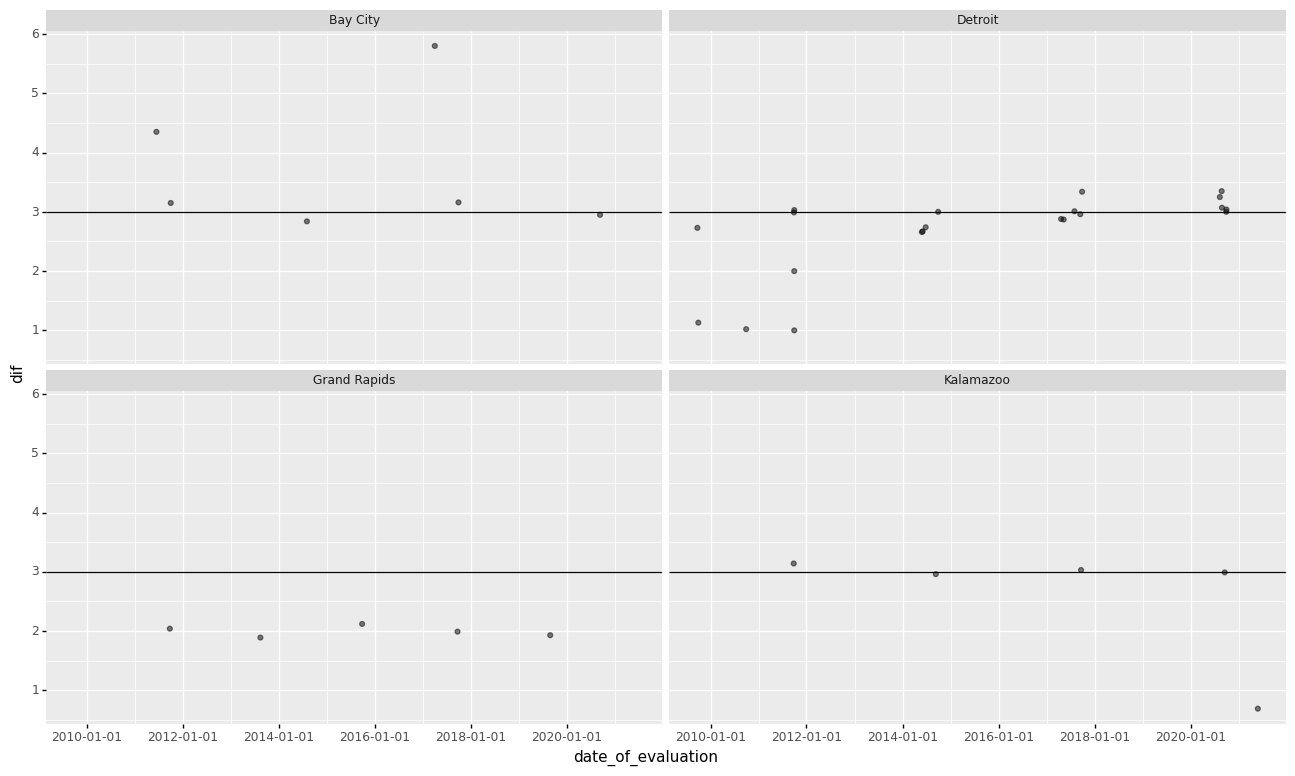

<ggplot: (344424572)>

In [354]:
interest = ['MEGASITE']
(
    ggplot(df_multiple.query('epa_class.isin(@interest)'),aes(x='date_of_evaluation',y="dif"))
    +geom_point(alpha=.5)
    + geom_hline(aes(yintercept='3'))
#     +geom_vline(yintercept=[2,5],alpha=.5)
    + facet_wrap('district')
    + theme(figure_size=(16,9))
)

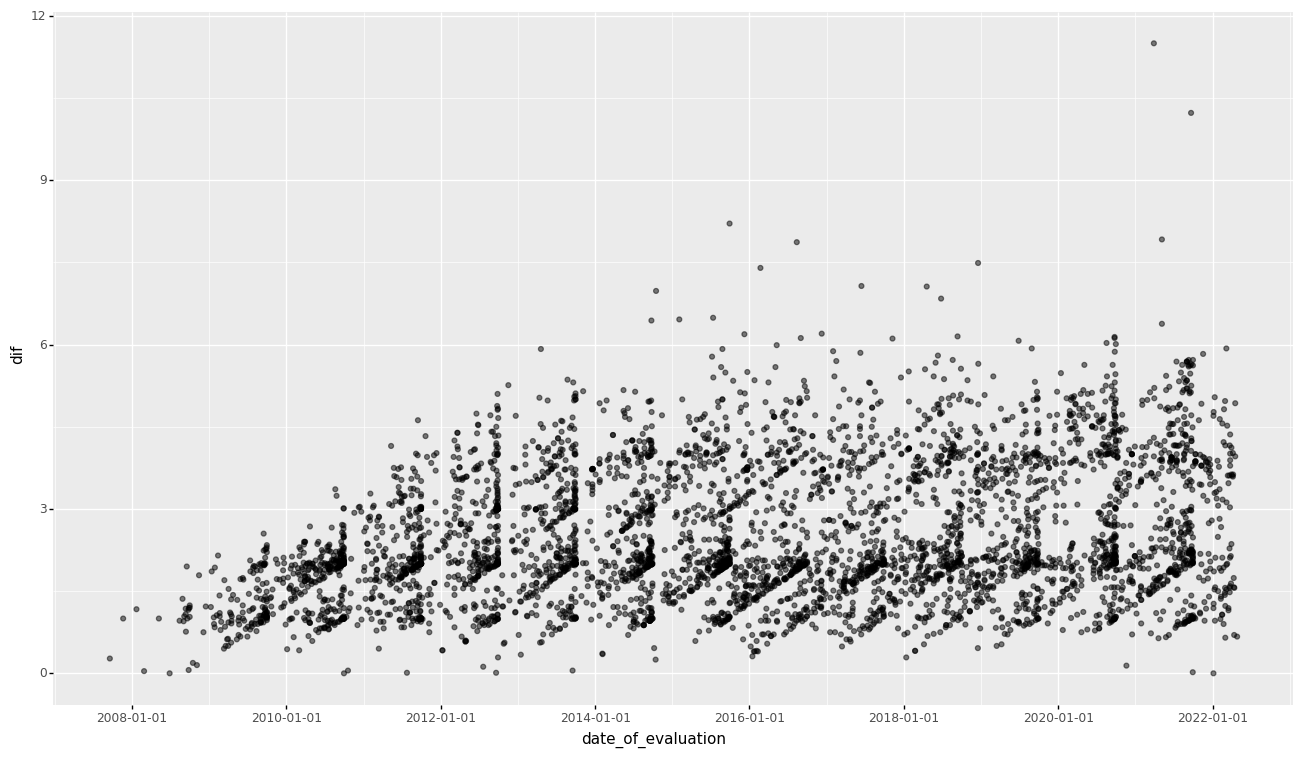

<ggplot: (339479363)>

In [397]:
# Both sources no division by district
interest = ['MAJOR','SMOPTOUT']
(
    ggplot(df_multiple.query('epa_class.isin(@interest)'),aes(x='date_of_evaluation',y="dif"))
    +geom_point(alpha=.5)
#     +geom_vline(yintercept=[2,5],alpha=.5)
    + theme(figure_size=(16,9))
)

In [227]:
# Getting a frame that justs identifying info
df_id = df[['srn','facility_name','city','county','district','epa_class']].drop_duplicates(subset='state_registrtion_number')
df_median = df.query('state_registrtion_number.isin(@pti_srn) and dif.notnull()').groupby('state_registrtion_number').dif.median() \
.reset_index().sort_values('dif').merge(df_id,how="left",left_on="state_registrtion_number",right_on="state_registrtion_number")

In [419]:
df_single_no_negatives = df_single.query('dif >= 0')
df_multiple['approved'] = ""
df_multiple['approved_converted'] = ""
df_all = pd.concat([df_multiple,df_single_no_negatives])
df_all

/var/folders/_4/_njb58q944xdbv6xcbzbzmqh0000gn/T/ipykernel_1441/793045788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/_4/_njb58q944xdbv6xcbzbzmqh0000gn/T/ipykernel_1441/793045788.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,date_of_evaluation,srn,facility_name,address,city,county,district,epa_class,dif,approved,approved_converted
0,2022-03-17,P0789,"KALITTA AIR, LLC",5063 SKYWAY STREET,OSCODA,IOSCO,Bay City,SMOPTOUT,3.47,,
1,2022-02-28,B1991,GM LLC Saginaw Metal Casting Operations,1629 N. WASHINGTON,SAGINAW,SAGINAW,Bay City,MAJOR,1.43,,
2,2022-02-22,B2644,Hemlock Semiconductor Operations LLC,12334 Geddes Rd.,HEMLOCK,SAGINAW,Bay City,MAJOR,1.93,,
3,2022-02-10,N0854,TI GROUP AUTOMOTIVE SYSTEMS LLC - Caro Test Ce...,628 COLUMBIA ST,CARO,TUSCOLA,Bay City,MAJOR,1.40,,
4,2022-01-27,N1652,West Branch Production Gathering & Compressor ...,2251 SIMMONS RD,WEST BRANCH,OGEMAW,Bay City,SMOPTOUT,3.06,,
...,...,...,...,...,...,...,...,...,...,...,...
1210,2008-01-17,N6760,"D & B Metal Finishings, LLC",22803 Patmore St,CLINTON TWP,MACOMB,Warren,SMOPTOUT,1.69,2004-08-05 00:00:00,2006-05-10 00:00:00
1214,2007-11-19,N3409,ARMALY SPONGE COMPANY,1900 EASY ST,WALLED LAKE,OAKLAND,Warren,SMOPTOUT,0.51,2007-05-15 00:00:00,2007-05-15 00:00:00
1217,2007-11-13,G5067,WILLIAM BEAUMONT HOSPITAL,3601 W. 13 MILE RD.,ROYAL OAK,OAKLAND,Warren,MAJOR,1.51,2002-06-26 00:00:00,2006-05-10 00:00:00
1218,2007-11-12,A5260,FORD MOTOR COMPANY WIXOM ASSEMBLY PLANT,28801 WIXOM ROAD,WIXOM,OAKLAND,Warren,MINOR,1.51,2004-02-26 00:00:00,2006-05-10 00:00:00


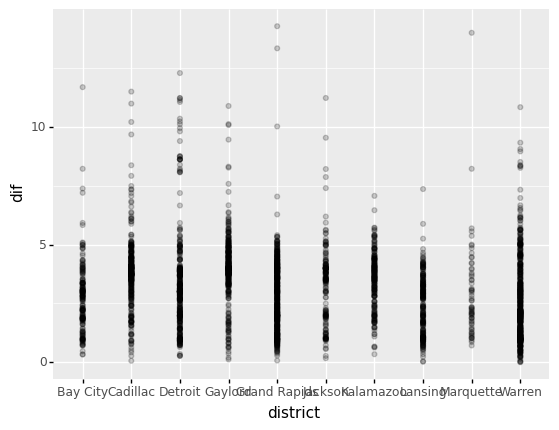

<ggplot: (343044012)>

In [423]:
from plotnine import *

(
    ggplot(df_all.query('epa_class == "SMOPTOUT"'), aes(x="district",y="dif"))
    + geom_point(alpha=.2)
)

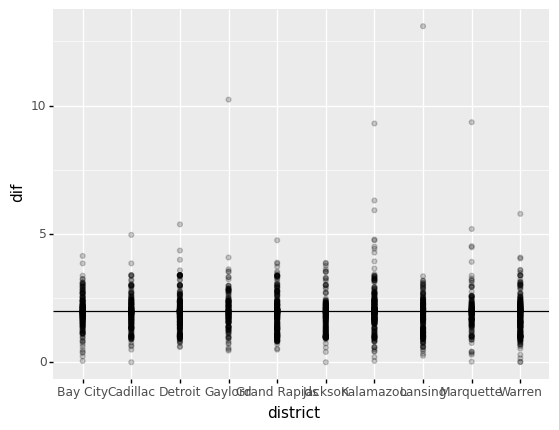

<ggplot: (343719623)>

In [429]:

(
    ggplot(df_all.query('epa_class == "MAJOR"'), aes(x="district",y="dif"))
    + geom_point(alpha=.2)
    + geom_hline(aes(yintercept=2))
    
)

/Users/shelbyjouppi/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


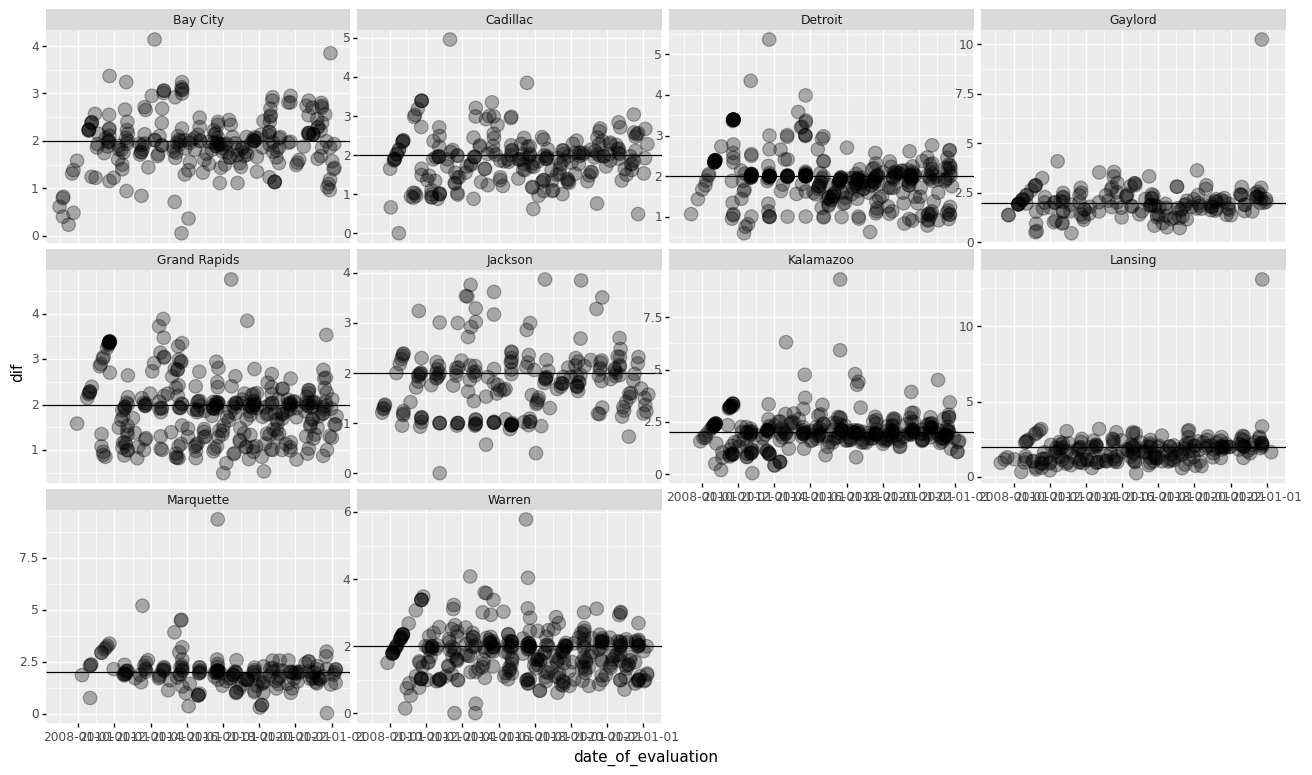

<ggplot: (340012255)>

In [427]:
# What is up with Jackson and Warren? 
(
    ggplot(df_all.query('epa_class == "MAJOR"'), aes(x="date_of_evaluation",y="dif"))
    + geom_point(alpha=.3, size=5)
    + geom_hline(aes(yintercept=2))
    + theme(figure_size=(16,9))
    + facet_wrap('district',scales="free_y")
)

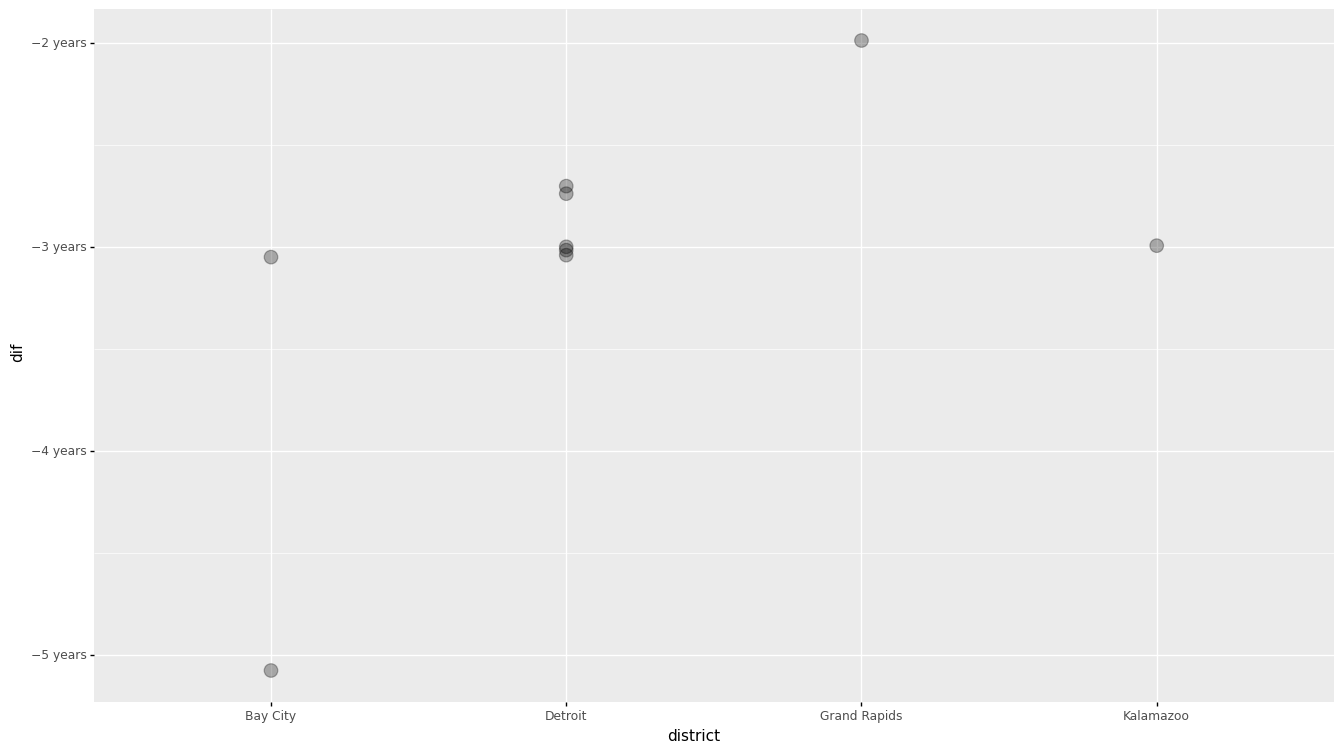

<ggplot: (346442268)>

In [430]:
(
    ggplot(df_median.query('epa_class == "MEGASITE"'), aes(x="district",y="dif"))
    + geom_point(alpha=.3, size=5)
    + theme(figure_size=(16,9))
)

In [437]:
df_median = df_all.groupby(['srn','epa_class','district']).dif.median().reset_index()

/Users/shelbyjouppi/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


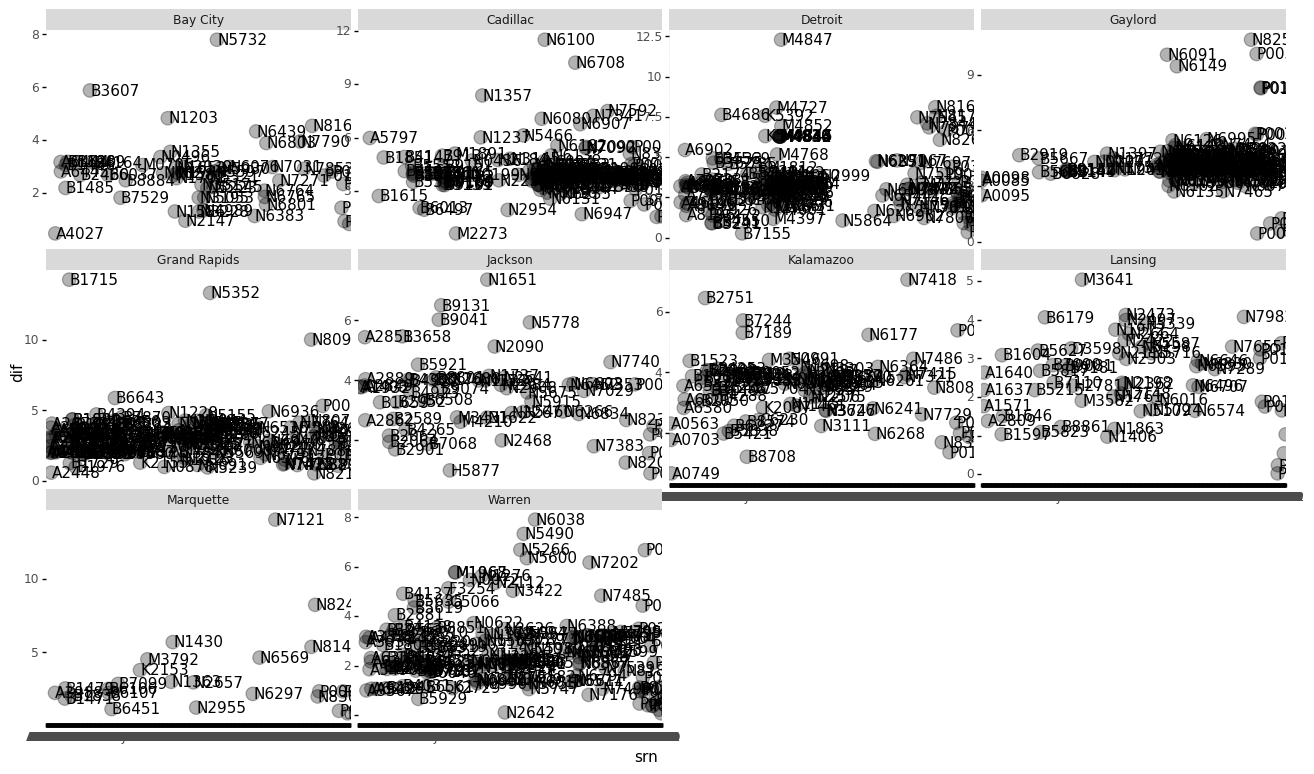

<ggplot: (345321241)>

In [439]:
interest=['SMOPTOUT']
(
    ggplot(df_median.query('epa_class.isin(@interest)'), aes(x="srn",y="dif", label="srn"))
    + geom_point(alpha=.3, size=5)
    + theme(figure_size=(16,9))
    + geom_text(ha='left', nudge_x=1)
    + facet_wrap('district', scales="free_y")
)

What sources that are still in the active permits list are past due on their inspections?

In [451]:
df_current = df_all.sort_values(['srn','date_of_evaluation'],ascending=False) \
.drop_duplicates(subset='srn').query('srn.isin(@pti_srn)')

df_current['duration_to_date'] = ((pd.to_datetime('2022-04-28') - df_current.date_of_evaluation) /  np.timedelta64(1, 'Y')).round(2) 

In [457]:
df_current.sort_values(['epa_class','duration_to_date'],ascending=False)

,date_of_evaluation,srn,facility_name,address,city,county,district,epa_class,dif,approved,approved_converted,duration_to_date
69,2007-06-26,N6383,"Saginaw Powertrain, Inc.",950 Bridgeview North,SAGINAW,SAGINAW,Bay City,SMOPTOUT,1.13,1998-05-13 00:00:00,2006-05-10 00:00:00,14.84
373,2008-01-08,N6262,GONZALEZ MFG,2555 CLARK ST,DETROIT,WAYNE,Detroit,SMOPTOUT,1.66,1998-02-23 00:00:00,2006-05-10 00:00:00,14.30
2036,2008-09-12,M4397,ASC INC,34165 AUTRY,LIVONIA,WAYNE,Detroit,SMOPTOUT,0.76,,,13.62
45,2008-12-22,A4027,"MCKAY PRESS, INC.",215 STATE ST,MIDLAND,MIDLAND,Bay City,SMOPTOUT,0.47,2008-07-02 00:00:00,2008-07-02 00:00:00,13.35
6595,2010-09-14,A6237,Henkel Corporation,1600 WASHINGTON AVE,PORT HURON,SAINT CLAIR,Warren,SMOPTOUT,2.18,,,11.62
...,...,...,...,...,...,...,...,...,...,...,...,...
2751,2022-03-22,N3748,"Belding Tank Technologies, Inc.",200 N Gooding St.,BELDING,IONIA,Grand Rapids,MAJOR,1.56,,,0.10
494,2022-03-22,A5764,"Ventra Evart, LLC",601 W. Seventh Street,EVART,OSCEOLA,Cadillac,MAJOR,2.28,,,0.10
4827,2022-03-29,N7256,UNIVERSAL COATING INC.,5204 ENERGY DR.,FLINT,GENESEE,Lansing,MAJOR,1.64,,,0.08
2744,2022-04-11,N7374,Plastic Plate Kraft,5675 KRAFT AVENUE,CASCADE TWP,KENT,Grand Rapids,MAJOR,1.74,,,0.05


In [464]:
df_current.query('duration_to_date > 5 and epa_class =="MAJOR"').sort_values('duration_to_date',ascending=False)

,date_of_evaluation,srn,facility_name,address,city,county,district,epa_class,dif,approved,approved_converted,duration_to_date
355,2011-07-12,A6466,"TTOD Liquidation, Inc.",3768 N. MAIN ST.,DECKERVILLE,SANILAC,Bay City,MAJOR,1.91,,,10.80
1586,2016-05-11,N0246,HD INDUSTRIES,19455 GLENDALE,DETROIT,WAYNE,Detroit,MAJOR,1.72,,,5.96


In [483]:
count_opt = df_current.query('epa_class =="SMOPTOUT"').district.value_counts().reset_index()
past_due_opt = df_current.query('epa_class =="SMOPTOUT" and duration_to_date > 5').district.value_counts().reset_index()

opt_districts = count_opt.merge(past_due_opt,how="left",left_on='index',right_on='index') \
.rename({"district_x":'sources','district_y':'overdue','index':'district'},axis=1)

opt_districts['share_overdue'] = (opt_districts.overdue / opt_districts.sources).round(2)

In [485]:
opt_districts.sort_values('share_overdue',ascending=False)

,district,sources,overdue,share_overdue
2,Detroit,117,16,0.14
9,Marquette,18,2,0.11
1,Warren,133,12,0.09
8,Jackson,47,4,0.09
4,Cadillac,91,7,0.08
3,Gaylord,99,5,0.05
5,Kalamazoo,73,3,0.04
7,Bay City,49,2,0.04
0,Grand Rapids,136,3,0.02
6,Lansing,54,1,0.02


In [494]:
count_major = df_current.query('epa_class =="MAJOR"').district.value_counts().reset_index()
past_due_major = df_current.query('epa_class =="MAJOR" and duration_to_date > 2').district.value_counts().reset_index()

major_districts = count_major.merge(past_due_major,how="left",left_on='index',right_on='index') \
.rename({"district_x":'sources','district_y':'overdue','index':'district'},axis=1)

major_districts['share_overdue'] = (major_districts.overdue / major_districts.sources).round(2)
major_districts.sort_values('share_overdue',ascending=False)

,district,sources,overdue,share_overdue
8,Marquette,18,4.0,0.22
1,Detroit,41,6.0,0.15
0,Kalamazoo,44,6.0,0.14
7,Bay City,22,3.0,0.14
5,Lansing,23,2.0,0.09
6,Gaylord,22,2.0,0.09
2,Grand Rapids,34,2.0,0.06
3,Warren,34,2.0,0.06
4,Cadillac,26,1.0,0.04
9,Jackson,18,NaN,NaN


In [492]:
count_opt = df_current.query('epa_class =="SMOPTOUT"').county.value_counts().reset_index()
past_due_opt = df_current.query('epa_class =="SMOPTOUT" and duration_to_date > 5').county.value_counts().reset_index()

opt_counties = count_opt.merge(past_due_opt,how="left",left_on='index',right_on='index') \
.rename({"county_x":'sources','county_y':'overdue','index':'district'},axis=1)

opt_counties['share_overdue'] = (opt_counties.overdue / opt_counties.sources).round(2)
opt_counties.sort_values('share_overdue',ascending=False).head(20)

,district,sources,overdue,share_overdue
66,BENZIE,1,1.0,1.00
37,CHIPPEWA,5,2.0,0.40
34,CHARLEVOIX,5,2.0,0.40
56,LAPEER,3,1.0,0.33
23,SAINT JOSEPH,8,2.0,0.25
46,HILLSDALE,4,1.0,0.25
43,MIDLAND,4,1.0,0.25
31,OSCODA,5,1.0,0.20
29,SAGINAW,6,1.0,0.17
26,LENAWEE,7,1.0,0.14


In [498]:
count_major = df_current.query('epa_class =="MAJOR"').county.value_counts().reset_index()
past_due_major = df_current.query('epa_class =="MAJOR" and duration_to_date > 2').county.value_counts().reset_index()

major_counties = count_major.merge(past_due_major,how="left",left_on='index',right_on='index') \
.rename({"county_x":'sources','county_y':'overdue','index':'district'},axis=1)

major_counties['share_overdue'] = (major_counties.overdue / major_counties.sources).round(2)
major_counties.sort_values(['sources','share_overdue'],ascending=False).head(20)

,district,sources,overdue,share_overdue
0,WAYNE,41,6.0,0.15
1,KENT,16,2.0,0.12
2,MACOMB,16,1.0,0.06
3,OAKLAND,11,1.0,0.09
4,CALHOUN,10,2.0,0.20
5,OTTAWA,9,NaN,NaN
6,BERRIEN,8,1.0,0.12
7,ALLEGAN,8,NaN,NaN
10,SAINT JOSEPH,7,1.0,0.14
13,WEXFORD,7,1.0,0.14


In [ ]:
def past_due(duration_to_date):
    if duration_to_date 

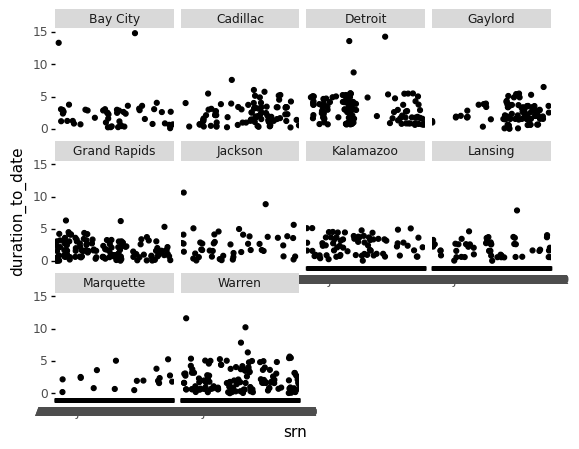

<ggplot: (351438686)>

In [466]:
interest=['SMOPTOUT']

(
 ggplot(df_current.query('epa_class.isin(@interest)'),aes(x="srn",y="duration_to_date"))
    +geom_point()
    +facet_wrap('district')
)